In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # This is the missing import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.over_sampling import SMOTE
log = LogisticRegression()
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn. neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("donateacry-corpus_features_final.csv")
df = pd.DataFrame(data)

# Drop the first column (column 'A')
df = df.iloc[:, 1:]
df

,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,...,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,...,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,...,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,...,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,...,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,4,0.036321,0.012994,0.042826,0.460018,613.970520,291.439865,19.730806,-45.207684,0.021832,...,-4.639066,0.584061,-10.853903,3.248470,6.053586,-5.002748,-0.769779,0.259279,-4.109865,-0.197854
453,4,0.006673,0.002049,0.105679,0.021918,1195.248678,438.517237,25.978298,-55.034866,-0.080119,...,-0.379960,12.435725,-7.656326,-5.199711,2.705278,-2.540238,-0.782420,0.764154,-2.904532,0.247652
454,4,0.004490,0.001858,0.115782,0.003234,1447.092259,736.852973,28.304186,-58.661260,0.083645,...,-15.367967,6.072005,-23.269968,-11.039415,3.739090,-9.503819,-7.832272,-6.361354,-13.773407,-6.661149
455,4,0.090113,0.032940,0.105524,0.946393,1305.720324,592.416192,26.528082,-40.918472,-0.023269,...,-14.185391,1.068526,-40.488503,-8.189845,-1.425352,-26.041030,-0.625539,7.053206,-12.801304,-3.918470


In [3]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

Class=0, n=16 (3.501%)
Class=1, n=8 (1.751%)
Class=2, n=27 (5.908%)
Class=3, n=382 (83.589%)
Class=4, n=24 (5.252%)


c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


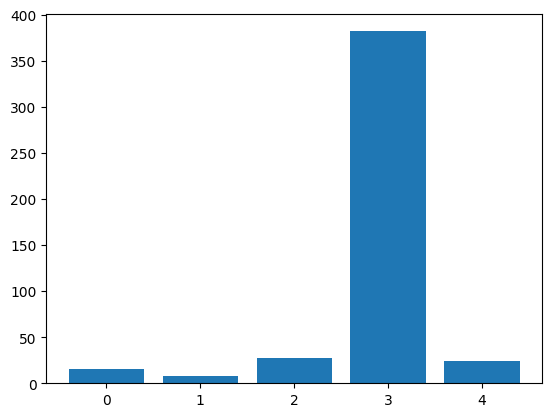

In [4]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=382 (20.000%)
Class=1, n=382 (20.000%)
Class=2, n=382 (20.000%)
Class=3, n=382 (20.000%)
Class=4, n=382 (20.000%)


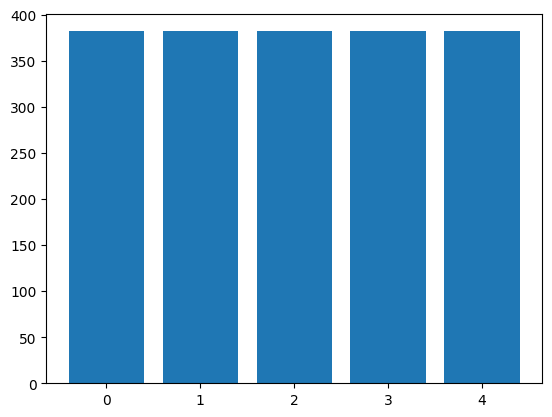

In [5]:
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [6]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=43)
X_train

,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,del2MFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
667,0.021125,0.006982,0.115260,0.050761,1268.576604,575.033373,25.888391,-49.849270,0.101231,0.018745,...,-10.352673,-0.527193,-25.959088,-4.538261,-4.518997,-22.279628,-4.329187,0.148017,-11.208961,-3.500948
1,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,0.018910,...,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
1066,0.069789,0.027594,0.103917,2.441427,1297.219329,524.616950,24.913186,-40.019214,0.014795,0.009818,...,-1.094372,7.392326,-17.196382,-5.690862,0.495833,-8.081944,-1.623520,-4.304835,-10.265247,-1.029414
694,0.017598,0.005445,0.077664,0.067072,1006.474335,514.488360,23.641008,-50.873327,0.008553,0.015564,...,-1.851868,0.398040,-19.474707,-6.707675,-2.637557,-11.164153,-4.153768,-5.688089,-10.693090,-3.225728
1618,0.040889,0.014627,0.089143,0.316716,1117.336097,581.731805,25.514562,-46.626364,0.005916,0.003809,...,-4.171737,-1.441902,-25.009285,-6.928303,-6.365671,-18.756669,-3.998210,-3.744819,-10.568797,1.943031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.060382,0.021864,0.129519,0.516698,1442.016513,477.250633,27.914281,-44.872753,-0.044279,-0.018488,...,-21.104107,1.983770,-29.050611,0.969242,9.112587,-15.397905,-4.048688,-1.600365,-11.649181,-2.346313
1841,0.036108,0.014263,0.085822,0.329100,1116.318903,516.718223,27.519762,-45.990294,0.000063,-0.000184,...,-4.996634,-1.037369,-22.302354,-12.272855,-5.119165,-10.727512,-5.568683,-6.269678,-6.409968,4.401566
255,0.018234,0.008187,0.076690,0.056231,1140.737911,511.964073,28.831582,-52.893566,0.061031,0.017043,...,-21.179253,4.047728,-23.068518,-17.089243,-0.407572,-7.930722,-5.632433,-0.572822,-7.331145,-6.839188
1344,0.021666,0.007169,0.117355,0.104060,1276.650834,690.626912,29.955031,-48.438549,0.035651,0.053311,...,-8.559689,-6.007891,-28.075547,2.801218,3.394099,-18.488237,-4.328799,-8.813247,-23.192536,-6.863498


In [7]:
print(y_train)

[0 0 1 ... 3 2 4]


# 1. SVM

In [8]:
from sklearn.svm import SVC  # Import the Support Vector Classifier

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# Create the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)  # You can adjust the kernel and C parameter as needed

# Train the model
svm_classifier.fit(X_train,y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       131
           1       0.93      0.95      0.94       131
           2       0.75      0.77      0.76       149
           3       0.56      0.41      0.47       128
           4       0.69      0.77      0.73       130

    accuracy                           0.76       669
   macro avg       0.75      0.76      0.75       669
weighted avg       0.75      0.76      0.75       669

Confusion Matrix:
[[115   2   3   3   8]
 [  0 125   0   6   0]
 [  3   2 115  16  13]
 [ 19   6  28  52  23]
 [  7   0   7  16 100]]


# 2 . Random Forest

In [9]:
# Adding random forest algo 
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=67)

# Train the model
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       131
           1       0.98      0.98      0.98       131
           2       0.98      0.97      0.98       149
           3       0.92      0.80      0.86       128
           4       0.87      0.96      0.92       130

    accuracy                           0.94       669
   macro avg       0.94      0.94      0.94       669
weighted avg       0.95      0.94      0.94       669

Confusion Matrix:
[[130   0   0   1   0]
 [  0 129   0   2   0]
 [  0   0 145   3   1]
 [  3   2   3 103  17]
 [  2   0   0   3 125]]


# 3. KNN

In [10]:
# # Create a kNN classifier
# k = 5  # You can adjust the value of k (number of neighbors)
# knn_classifier = KNeighborsClassifier(n_neighbors=k)

# # Train the model
# knn_classifier.fit(X_train, y_train)

# # Make predictions
# y_pred = knn_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy}")
# print(report)